In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
height = np.random.normal(5.5,2.5,20)

In [3]:
height

array([ 8.50256035, 11.04577353,  2.84055324,  3.6584046 ,  5.31378724,
        7.49962766,  2.50966649,  6.99781521,  4.38281597,  8.56273265,
        6.06678749,  9.04159277,  6.02494342,  6.5000794 ,  9.50927997,
        4.95312092,  0.43869264,  1.26249647,  6.08574693,  2.16932943])

In [39]:
weight = ((height + np.random.random(20))*10)

In [40]:
weight

array([ 91.75568091, 115.4034206 ,  38.06077328,  38.5793879 ,
        60.2264094 ,  78.27681507,  33.7729109 ,  74.18948271,
        53.81995326,  91.74591295,  70.00952857,  97.56284492,
        65.00953459,  67.41170986,  98.418979  ,  53.36146426,
         7.62046608,  20.58608641,  67.29180231,  26.05185509])

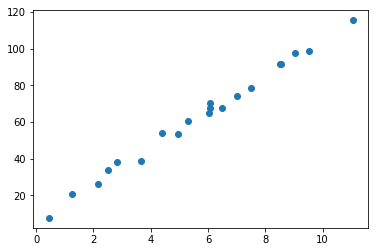

In [41]:
plt.scatter(height,weight)

In [44]:
x_train = height[:14]
y_train = weight[:14]

In [46]:
x_test = height[14:]
y_test = weight[14:]

In [47]:
x_test

array([9.50927997, 4.95312092, 0.43869264, 1.26249647, 6.08574693,
       2.16932943])

In [48]:
y_test

array([98.418979  , 53.36146426,  7.62046608, 20.58608641, 67.29180231,
       26.05185509])

In [49]:
x_train

array([ 8.50256035, 11.04577353,  2.84055324,  3.6584046 ,  5.31378724,
        7.49962766,  2.50966649,  6.99781521,  4.38281597,  8.56273265,
        6.06678749,  9.04159277,  6.02494342,  6.5000794 ])

In [50]:
y_train

array([ 91.75568091, 115.4034206 ,  38.06077328,  38.5793879 ,
        60.2264094 ,  78.27681507,  33.7729109 ,  74.18948271,
        53.81995326,  91.74591295,  70.00952857,  97.56284492,
        65.00953459,  67.41170986])

$$ m = \sum\limits_{i=0}^{N} \frac {(y_i-\bar y)(x_i-\bar x)} {(x_i-\bar x)^2} $$

In [105]:
x = x_train
y = y_train 
x_bar = x.mean()
y_bar = y.mean()
x_xbar = x-x_bar
y_ybar = y-y_bar
m = (x_xbar * y_ybar).sum() / (x_xbar**2).sum() # fitting
print("Intercept m = ",m)
c = y_bar-m*x_bar # fitting 
print("Constant c = ",c)

y_pred = m*x+c # prediction
print(x)
print(y)
print(y_pred)

Intercept m =  9.666211170093218
Constant c =  8.288751901194239
[ 8.50256035 11.04577353  2.84055324  3.6584046   5.31378724  7.49962766
  2.50966649  6.99781521  4.38281597  8.56273265  6.06678749  9.04159277
  6.02494342  6.5000794 ]
[ 91.75568091 115.4034206   38.06077328  38.5793879   60.2264094
  78.27681507  33.7729109   74.18948271  53.81995326  91.74591295
  70.00952857  97.56284492  65.00953459  67.41170986]
[ 90.47629578 115.05953136  35.74613937  43.65166332  59.65294146
  80.78173654  32.5477182   75.93111142  50.65397658  91.05793388
  66.93160088  95.68669692  66.52712724  71.11989199]


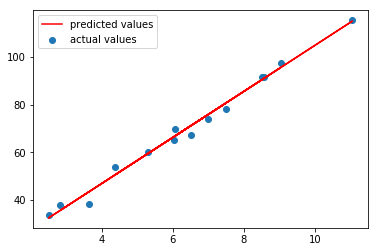

In [60]:
plt.scatter(x,y,label="actual values")
plt.plot(x,y_pred,label="predicted values",c='r')
plt.legend()
plt.show()

In [61]:
x_test

array([9.50927997, 4.95312092, 0.43869264, 1.26249647, 6.08574693,
       2.16932943])

In [62]:
y_test

array([98.418979  , 53.36146426,  7.62046608, 20.58608641, 67.29180231,
       26.05185509])

In [63]:
h = 5.5
w = m*h+c
print(w)

61.45291333670694


In [100]:
y_pred = x_test*m + c

In [101]:
y_pred

array([100.20746014,  56.16666462,  12.5292476 ,  20.49230935,
        67.11486686,  29.25794827])

In [102]:
y_test

array([98.418979  , 53.36146426,  7.62046608, 20.58608641, 67.29180231,
       26.05185509])

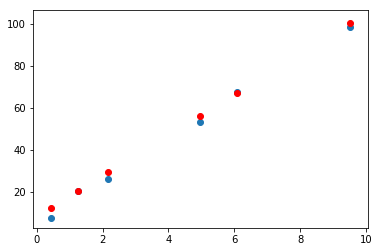

In [103]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred,c='r')
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression

In [81]:
clf  = LinearRegression()

In [82]:
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
clf.fit(x.reshape(-1,1),y) # learning, train, 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
clf.predict([[5,]])

array([56.61980775])

In [87]:
df  = pd.DataFrame({
    'height':height,
    'weight':weight
})

In [88]:
df.head()

,height,weight
0,8.502560,91.755681
1,11.045774,115.403421
2,2.840553,38.060773
3,3.658405,38.579388
4,5.313787,60.226409


In [89]:
clf = LinearRegression()

In [92]:
clf.fit(df[['height']],df['weight'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
clf.coef_

array([9.86297306])

In [94]:
clf.intercept_

6.5515561803371725

In [95]:
m

9.666211170093218

In [96]:
c

8.288751901194239

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
mean_squared_error(df[['weight']],clf.predict(df[['height']]))

5.751794186867461

In [106]:
mean_squared_error(y,y_pred)

5.965889637203267

In [107]:
from sklearn import datasets

In [108]:
housing = datasets.load_boston()

In [111]:
print(housing.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [112]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [113]:
housing.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [114]:
housing.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [115]:
clf = LinearRegression() # multivarient regressino 
clf.fit(housing.data,housing.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
clf.predict([housing.data[0]])

array([30.00384338])

In [119]:
housing.target[0]

24.0

In [121]:
x = mean_squared_error(housing.target,clf.predict(housing.data))

In [122]:
np.sqrt(x)

4.679191295697281